In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
crop_production = pd.read_csv("crop_production.csv")
soil_data = pd.read_csv("soil_data.csv")
crop_prices = pd.read_csv("crop_prices.csv")
district_rainfall = pd.read_csv("district wise rainfall normal.csv")

In [33]:
crop_production["District"] = crop_production["District"].str.strip().str.lower()
soil_data["District"] = soil_data["District"].str.strip().str.lower()
district_rainfall["DISTRICT"] = district_rainfall["DISTRICT"].str.strip().str.lower()
district_rainfall["STATE_UT_NAME"] = district_rainfall["STATE_UT_NAME"].str.strip().str.lower()
crop_production["Crop"] = crop_production["Crop"].str.strip().str.lower()
crop_prices["Crop"] = crop_prices["Crop"].str.strip().str.lower()

In [34]:
print("\n--- Crop Production ---")
print(crop_production.info())
print(crop_production.isnull().sum())
print(crop_production.describe())


--- Crop Production ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             5 non-null      object
 1   District          5 non-null      object
 2   Crop              5 non-null      object
 3   Year              5 non-null      int64 
 4   Area (Ha)         5 non-null      int64 
 5   Production (Ton)  5 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 372.0+ bytes
None
State               0
District            0
Crop                0
Year                0
Area (Ha)           0
Production (Ton)    0
dtype: int64
              Year    Area (Ha)  Production (Ton)
count     5.000000     5.000000          5.000000
mean   2020.400000  2620.000000       7880.000000
std       0.547723   664.830806       3433.948165
min    2020.000000  1500.000000       4000.000000
25%    2020.000000  2600.000000       5400.000000
50

In [35]:
crop_production = crop_production.dropna(subset=["Area (Ha)", "Production (Ton)"])
crop_production = crop_production[crop_production["Area (Ha)"] > 0]
crop_production = crop_production[crop_production["Production (Ton)"] > 0] 

In [36]:
print(crop_production[["Area (Ha)", "Production (Ton)"]].isnull().sum())
print((crop_production["Area (Ha)"] <= 0).sum())
print((crop_production["Production (Ton)"] <= 0).sum())

Area (Ha)           0
Production (Ton)    0
dtype: int64
0
0


In [37]:
crop_production.head()

,State,District,Crop,Year,Area (Ha),Production (Ton)
0,Maharashtra,pune,wheat,2020,3000,7200
1,Maharashtra,nashik,bajra,2020,2800,5400
2,Punjab,ludhiana,rice,2020,3200,10800
3,Karnataka,mysore,ragi,2021,2600,4000
4,Uttar Pradesh,meerut,sugarcane,2021,1500,12000


In [38]:
print("\n--- Soil Data ---")
print(soil_data.info())
print(soil_data.isnull().sum())


--- Soil Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   District   5 non-null      object 
 1   Soil_Type  5 non-null      object 
 2   pH         5 non-null      float64
 3   N (mg/kg)  5 non-null      int64  
 4   P (mg/kg)  5 non-null      int64  
 5   K (mg/kg)  5 non-null      int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 372.0+ bytes
None
District     0
Soil_Type    0
pH           0
N (mg/kg)    0
P (mg/kg)    0
K (mg/kg)    0
dtype: int64


In [39]:
soil_data = soil_data.dropna(subset=["pH", "N (mg/kg)", "P (mg/kg)", "K (mg/kg)"])

In [40]:
print("\n--- After Cleaning ---")
print(soil_data.isnull().sum())
soil_data.head()


--- After Cleaning ---
District     0
Soil_Type    0
pH           0
N (mg/kg)    0
P (mg/kg)    0
K (mg/kg)    0
dtype: int64


,District,Soil_Type,pH,N (mg/kg),P (mg/kg),K (mg/kg)
0,pune,Black Cotton,6.5,250,45,300
1,nashik,Red Soil,6.2,180,30,250
2,ludhiana,Alluvial,7.1,270,50,320
3,mysore,Laterite,6.8,190,40,280
4,meerut,Clay Loam,7.0,220,35,290


In [41]:
print("\n--- Crop Prices ---")
print(crop_prices.info())
print(crop_prices.isnull().sum())
crop_prices = crop_prices.dropna(subset=["Avg_Market_Price (₹/Quintal)"])


--- Crop Prices ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          5 non-null      int64 
 1   Crop                          5 non-null      object
 2   Avg_Market_Price (₹/Quintal)  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes
None
Year                            0
Crop                            0
Avg_Market_Price (₹/Quintal)    0
dtype: int64


In [42]:
print("\n--- District Rainfall ---")
print(district_rainfall.info())
print(district_rainfall.isnull().sum())


--- District Rainfall ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null

In [43]:
rainfall_clean = district_rainfall[["STATE_UT_NAME", "DISTRICT", "ANNUAL"]].copy()
rainfall_clean.rename(columns={
    "STATE_UT_NAME": "State",
    "DISTRICT": "District",
    "ANNUAL": "Annual_Rainfall_mm"
}, inplace=True)


In [44]:
print(rainfall_clean.info())
print(rainfall_clean.isnull().sum())
print(rainfall_clean.columns)
print(rainfall_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               641 non-null    object 
 1   District            641 non-null    object 
 2   Annual_Rainfall_mm  641 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.2+ KB
None
State                 0
District              0
Annual_Rainfall_mm    0
dtype: int64
Index(['State', 'District', 'Annual_Rainfall_mm'], dtype='object')
                         State       District  Annual_Rainfall_mm
0  andaman and nicobar islands        nicobar              2805.2
1  andaman and nicobar islands  south andaman              3015.7
2  andaman and nicobar islands  n & m andaman              2913.3
3            arunachal pradesh          lohit              3043.8
4            arunachal pradesh     east siang              4034.7


In [45]:
crop_production["Yield_Ton_per_Ha"] = crop_production["Production (Ton)"] / crop_production["Area (Ha)"]

In [46]:
print(crop_production[["Production (Ton)", "Area (Ha)", "Yield_Ton_per_Ha"]].head())

   Production (Ton)  Area (Ha)  Yield_Ton_per_Ha
0              7200       3000          2.400000
1              5400       2800          1.928571
2             10800       3200          3.375000
3              4000       2600          1.538462
4             12000       1500          8.000000


In [47]:
print(crop_production["Yield_Ton_per_Ha"].isnull().sum())
print(np.isinf(crop_production["Yield_Ton_per_Ha"]).sum())

0
0


In [48]:
print(crop_production["Yield_Ton_per_Ha"].describe())


count    5.000000
mean     3.448407
std      2.635305
min      1.538462
25%      1.928571
50%      2.400000
75%      3.375000
max      8.000000
Name: Yield_Ton_per_Ha, dtype: float64


<Axes: xlabel='Yield_Ton_per_Ha', ylabel='Count'>

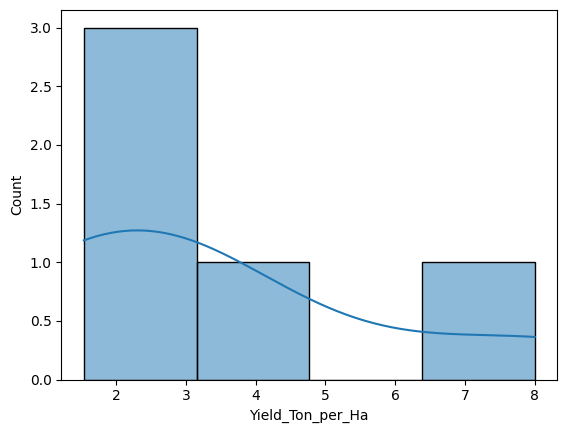

In [56]:
sns.histplot(crop_production["Yield_Ton_per_Ha"], kde=True)

<Axes: xlabel='Crop', ylabel='Yield_Ton_per_Ha'>

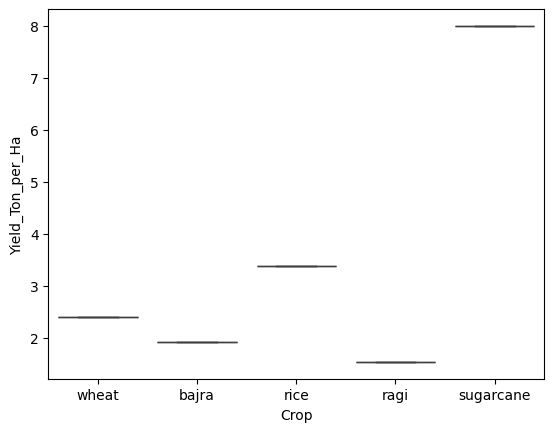

In [50]:
sns.boxplot(x="Crop", y="Yield_Ton_per_Ha", data=crop_production)


In [51]:
soil_rainfall_merged = pd.merge(soil_data, rainfall_clean, on="District", how="left")

In [52]:
soil_rainfall_merged.head()


,District,Soil_Type,pH,N (mg/kg),P (mg/kg),K (mg/kg),State,Annual_Rainfall_mm
0,pune,Black Cotton,6.5,250,45,300,maharashtra,1015.7
1,nashik,Red Soil,6.2,180,30,250,maharashtra,1029.6
2,ludhiana,Alluvial,7.1,270,50,320,punjab,685.6
3,mysore,Laterite,6.8,190,40,280,karnataka,758.6
4,meerut,Clay Loam,7.0,220,35,290,uttar pradesh,918.0


In [53]:
print(soil_rainfall_merged["Annual_Rainfall_mm"].isnull().sum())

0


In [55]:
crop_with_soil = pd.merge(crop_production, soil_rainfall_merged, on="District", how="left")

In [57]:
print(crop_with_soil.isnull().sum())

State_x               0
District              0
Crop                  0
Year                  0
Area (Ha)             0
Production (Ton)      0
Yield_Ton_per_Ha      0
Soil_Type             0
pH                    0
N (mg/kg)             0
P (mg/kg)             0
K (mg/kg)             0
State_y               0
Annual_Rainfall_mm    0
dtype: int64


In [58]:
crop_with_soil = crop_with_soil.dropna(subset=["pH", "N (mg/kg)", "P (mg/kg)", "K (mg/kg)", "Annual_Rainfall_mm"])

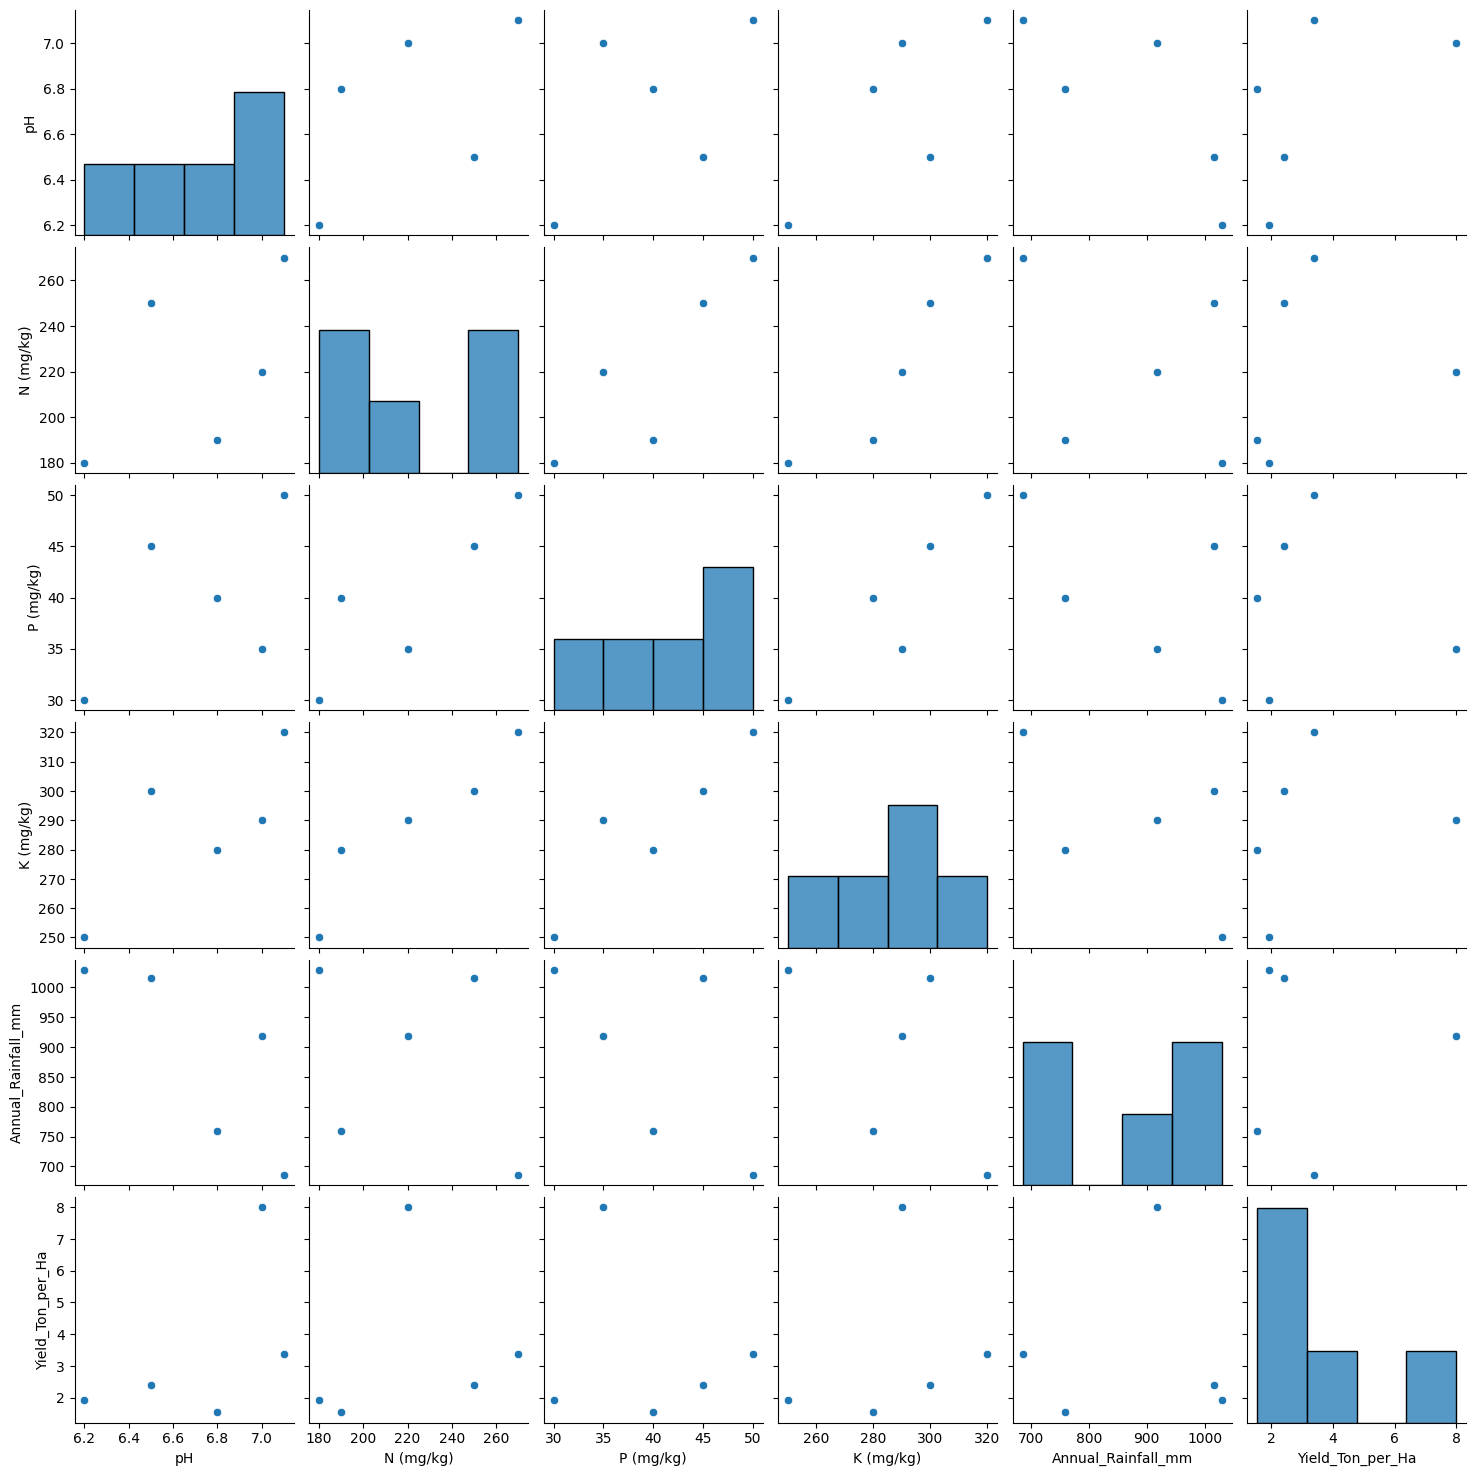

In [59]:
sns.pairplot(crop_with_soil, vars=["pH", "N (mg/kg)", "P (mg/kg)", "K (mg/kg)", "Annual_Rainfall_mm", "Yield_Ton_per_Ha"])
plt.show()

In [60]:
features = crop_with_soil[["pH", "N (mg/kg)", "P (mg/kg)", "K (mg/kg)", "Annual_Rainfall_mm"]]
target = crop_with_soil["Yield_Ton_per_Ha"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
print(X_test.shape, y_test.shape)


(1, 5) (1,)


In [67]:
final_dataset = pd.merge(crop_with_soil, crop_prices, on=["Year", "Crop"], how="left")

In [68]:
print(final_dataset["Avg_Market_Price (₹/Quintal)"].isnull().sum())

0


In [70]:
final_dataset["Estimated_Revenue_per_Ha"] = final_dataset["Yield_Ton_per_Ha"] * 10 * final_dataset["Avg_Market_Price (₹/Quintal)"]
final_dataset.groupby("Crop")["Estimated_Revenue_per_Ha"].mean().sort_values(ascending=False).head(10)

Crop
rice         74250.000000
wheat        45600.000000
bajra        30857.142857
ragi         26923.076923
sugarcane    24000.000000
Name: Estimated_Revenue_per_Ha, dtype: float64

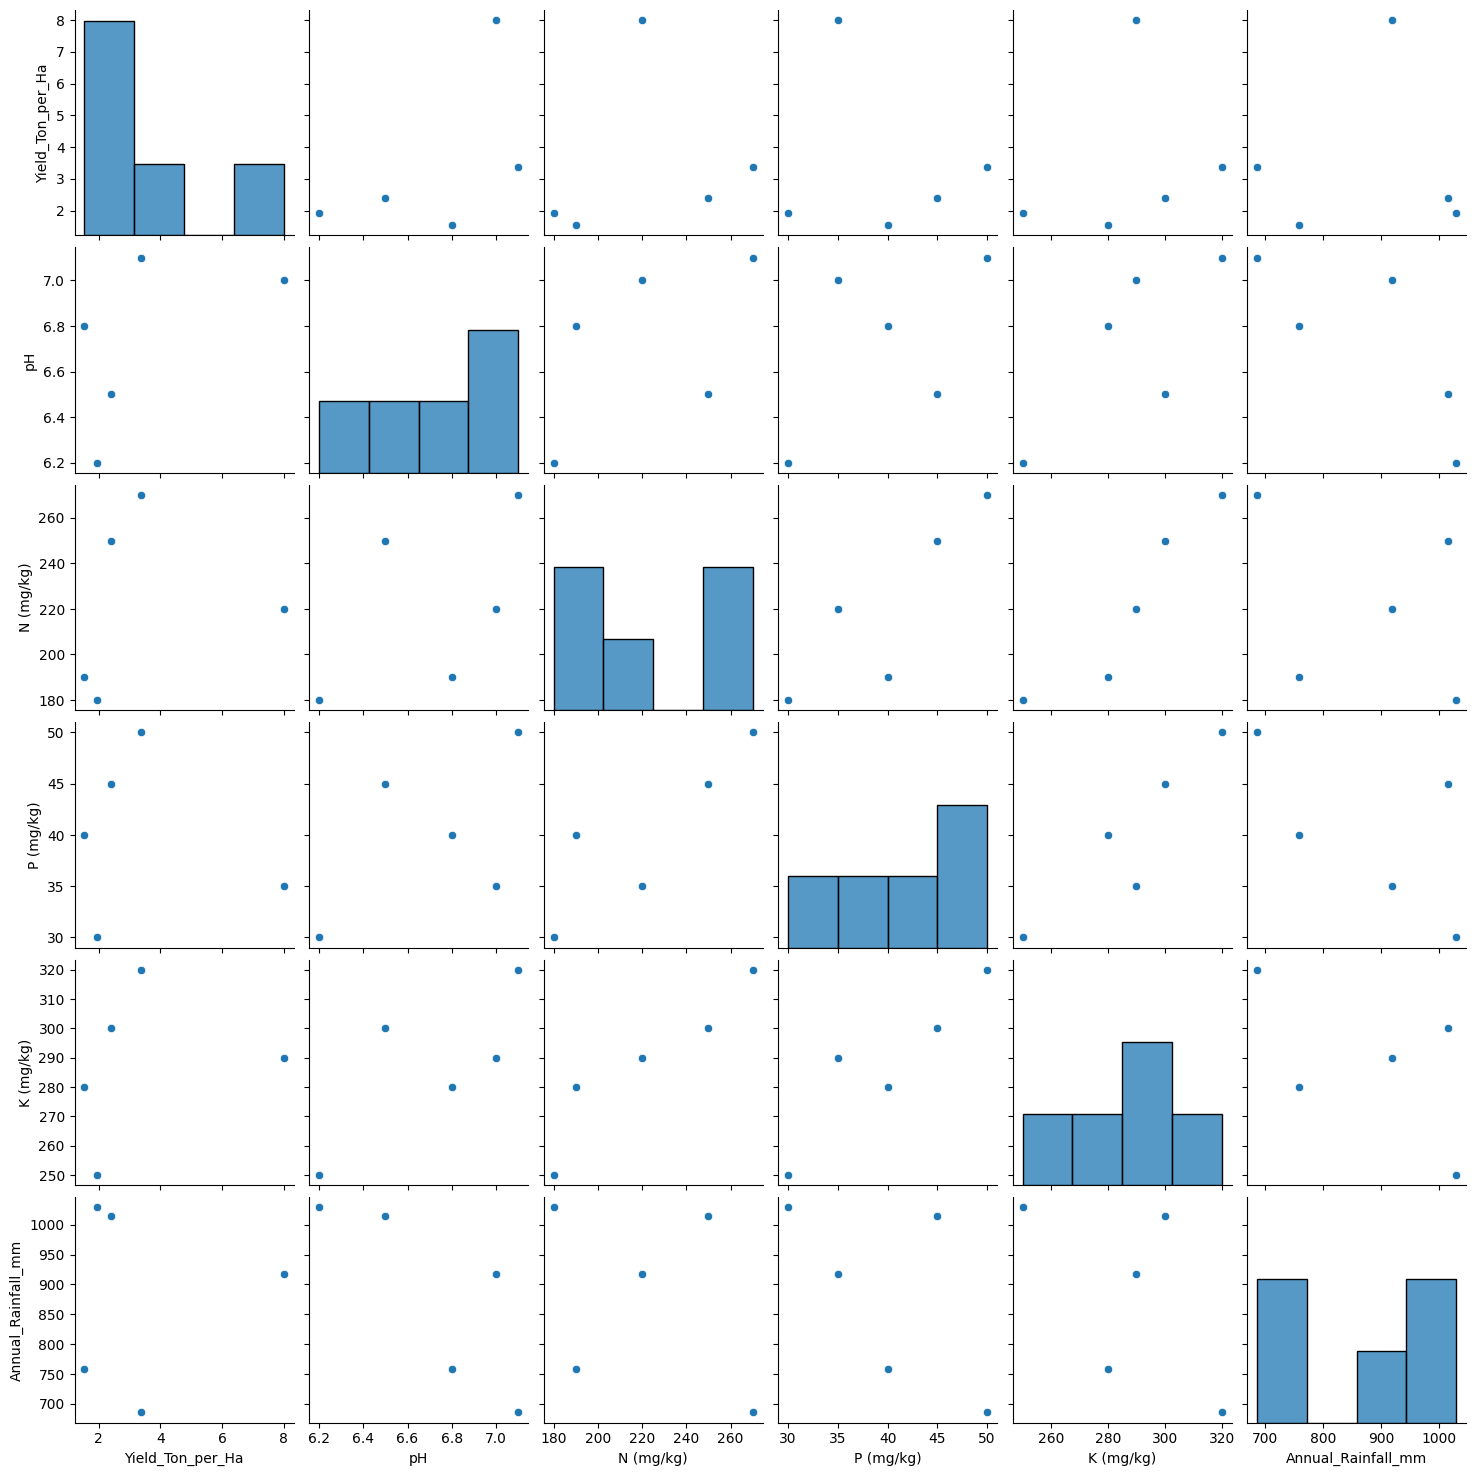

In [71]:
sns.pairplot(final_dataset[["Yield_Ton_per_Ha", "pH", "N (mg/kg)", "P (mg/kg)", "K (mg/kg)", "Annual_Rainfall_mm"]])


In [72]:
final_dataset["Profitability_Score"] = (
    final_dataset["Yield_Ton_per_Ha"] * final_dataset["Avg_Market_Price (₹/Quintal)"] / 10
)

In [73]:
print(final_dataset[["Yield_Ton_per_Ha", "Avg_Market_Price (₹/Quintal)", "Profitability_Score"]].head())


   Yield_Ton_per_Ha  Avg_Market_Price (₹/Quintal)  Profitability_Score
0          2.400000                          1900           456.000000
1          1.928571                          1600           308.571429
2          3.375000                          2200           742.500000
3          1.538462                          1750           269.230769
4          8.000000                           300           240.000000


In [74]:
print(final_dataset["Profitability_Score"].isnull().sum())


0


In [75]:
print(final_dataset["Profitability_Score"].describe())


count      5.000000
mean     403.260440
std      207.031926
min      240.000000
25%      269.230769
50%      308.571429
75%      456.000000
max      742.500000
Name: Profitability_Score, dtype: float64


In [76]:
print(final_dataset.groupby("Crop")["Profitability_Score"].mean().sort_values(ascending=False).head(10))


Crop
rice         742.500000
wheat        456.000000
bajra        308.571429
ragi         269.230769
sugarcane    240.000000
Name: Profitability_Score, dtype: float64


In [77]:
print(final_dataset.groupby("District")["Profitability_Score"].mean().sort_values(ascending=False).head(10))


District
ludhiana    742.500000
pune        456.000000
nashik      308.571429
mysore      269.230769
meerut      240.000000
Name: Profitability_Score, dtype: float64


In [78]:
final_dataset = final_dataset[[
    "State_x", "District", "Crop", "Year", "Yield_Ton_per_Ha",
    "Avg_Market_Price (₹/Quintal)", "Profitability_Score",
    "Soil_Type", "pH", "N (mg/kg)", "P (mg/kg)", "K (mg/kg)",
    "Annual_Rainfall_mm"
]].rename(columns={"State_x": "State"})

In [79]:
print(final_dataset.columns)


Index(['State', 'District', 'Crop', 'Year', 'Yield_Ton_per_Ha',
       'Avg_Market_Price (₹/Quintal)', 'Profitability_Score', 'Soil_Type',
       'pH', 'N (mg/kg)', 'P (mg/kg)', 'K (mg/kg)', 'Annual_Rainfall_mm'],
      dtype='object')


In [80]:
final_dataset.head()


,State,District,Crop,Year,Yield_Ton_per_Ha,Avg_Market_Price (₹/Quintal),Profitability_Score,Soil_Type,pH,N (mg/kg),P (mg/kg),K (mg/kg),Annual_Rainfall_mm
0,Maharashtra,pune,wheat,2020,2.400000,1900,456.000000,Black Cotton,6.5,250,45,300,1015.7
1,Maharashtra,nashik,bajra,2020,1.928571,1600,308.571429,Red Soil,6.2,180,30,250,1029.6
2,Punjab,ludhiana,rice,2020,3.375000,2200,742.500000,Alluvial,7.1,270,50,320,685.6
3,Karnataka,mysore,ragi,2021,1.538462,1750,269.230769,Laterite,6.8,190,40,280,758.6
4,Uttar Pradesh,meerut,sugarcane,2021,8.000000,300,240.000000,Clay Loam,7.0,220,35,290,918.0


In [81]:
print(final_dataset.shape)
print(final_dataset.isnull().sum())


(5, 13)
State                           0
District                        0
Crop                            0
Year                            0
Yield_Ton_per_Ha                0
Avg_Market_Price (₹/Quintal)    0
Profitability_Score             0
Soil_Type                       0
pH                              0
N (mg/kg)                       0
P (mg/kg)                       0
K (mg/kg)                       0
Annual_Rainfall_mm              0
dtype: int64


In [82]:
final_dataset.to_csv("final_agri_dataset.csv", index=False)
